In [24]:
#Imports

from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.utils import plot_model
from matplotlib import image
from matplotlib import pyplot as plt
import os
import time

tf.config.run_functions_eagerly(True)
tf.compat.v1.enable_eager_execution()

In [21]:
# Prepare the data

# The batch size we'll use for training
batch_size = 2

# Size of the image required to train our model
img_size = 120

# These many images will be used from the data archive
dataset_split = 10

master_dir = 'data'
x = []
y = []
for image_file in os.listdir( master_dir )[ 0 : dataset_split ]:
    rgb_image = Image.open( os.path.join( master_dir , image_file ) ).resize( ( img_size , img_size ) )
    print(type(rgb_image))
    # Normalize the RGB image array
    rgb_img_array = (np.asarray( rgb_image ) ) / 255
    gray_image = rgb_image.convert( 'L' )
    # Normalize the grayscale image array
    gray_img_array = ( np.asarray( gray_image ).reshape( ( img_size , img_size , 1 ) ) ) / 255
    # Append both the image arrays
    x.append( gray_img_array )
    y.append( rgb_img_array )

# Train-test splitting
train_x, test_x, train_y, test_y = train_test_split( np.array(x) , np.array(y) , test_size=0.9 )




print(x[0].shape)


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
(120, 120, 1)


In [22]:
#Get the model

from tensorflow.keras.models import load_model
cross_entropy = tf.keras.losses.BinaryCrossentropy()
mse = tf.keras.losses.MeanSquaredError()

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output) - tf.random.uniform( shape=real_output.shape , maxval=0.1 ) , real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output) + tf.random.uniform( shape=fake_output.shape , maxval=0.1  ) , fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output , real_y):
    real_y = tf.cast( real_y , 'float32' )
    return mse( fake_output , real_y )

generator_optimizer = tf.keras.optimizers.Adam( 0.0005 )
discriminator_optimizer = tf.keras.optimizers.Adam( 0.0005 )

generator = load_model('generator.keras', custom_objects={'generator_loss': generator_loss, 'generator_optimizer': generator_optimizer})
discriminator = load_model('discriminator.keras', custom_objects={'discriminator_loss': discriminator_loss, 'discriminator_optimizer': discriminator_optimizer})


<class 'numpy.ndarray'>


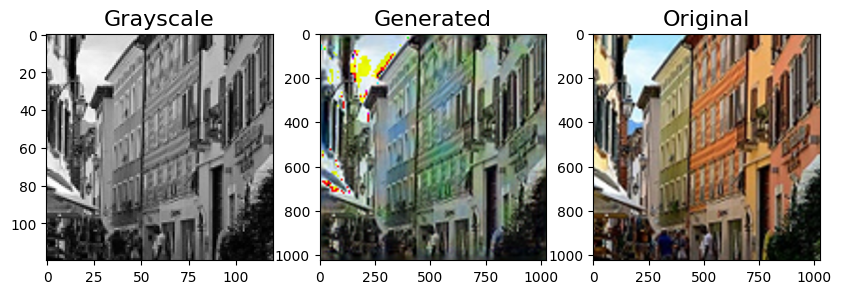

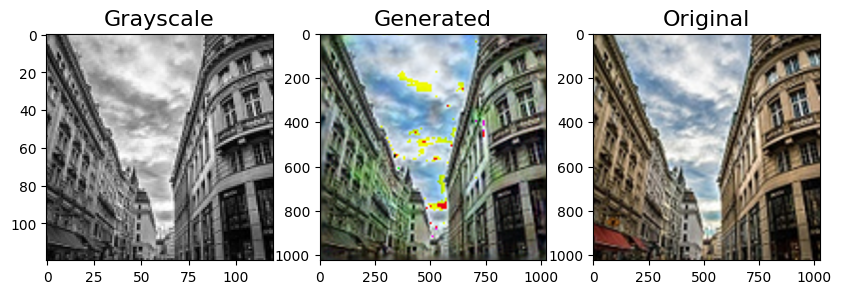

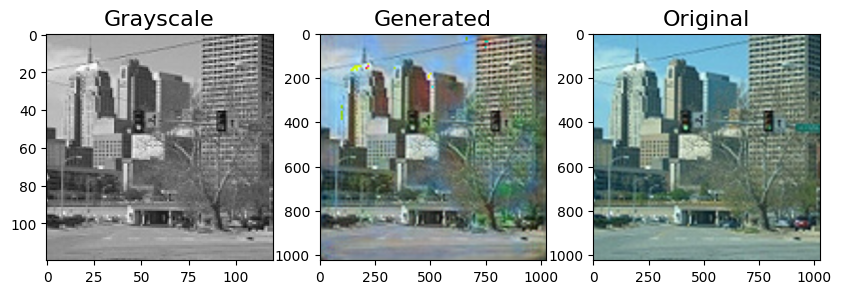

In [23]:
print(type(test_x[0]))
y = generator( test_x[0 : ] ).numpy()

for i in range(0, 3):
  plt.figure(figsize=(10,10))
  or_image = plt.subplot(3,3,1)
  or_image.set_title('Grayscale', fontsize=16)
  plt.imshow( test_x[i].reshape((120,120)) , cmap='gray' )

  in_image = plt.subplot(3,3,2)    
  image = Image.fromarray( ( y[i] * 255 ).astype( 'uint8' ) ).resize( ( 1024 , 1024 ) )
  image = np.asarray( image )
  in_image.set_title('Generated', fontsize=16)
  plt.imshow( image )

  ou_image = plt.subplot(3,3,3)
  image = Image.fromarray( ( test_y[i] * 255 ).astype( 'uint8' ) ).resize( ( 1024 , 1024 ) )
  ou_image.set_title('Original', fontsize=16)
  plt.imshow( image )

  plt.show()